In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

def get_historical_data():
    ''' Daily quotes from Google. Date format='yyyy-mm-dd' '''
    # import data
    df = pd.read_csv('./rsc/AAPL_data.csv')
    # shift dates forward by one day
    df.dropna()
    df['Open-Close'] = df.open - df.close
    df['High-Low'] = df.high - df.low
    return df

In [2]:
data = get_historical_data()
data.head()

,date,20_day_sma,close,ewma_12,ewma_26,high,low,obv_10,open,rsi_14,volume,Open-Close,High-Low
0,2015-01-30,110.6415,117.16,113.100715,111.782535,120.00,116.850,36869040.5,118.40,91.43,83745461.0,1.24,3.150
1,2015-02-02,111.1065,118.63,113.977641,112.415496,119.17,116.080,37070624.7,118.05,92.46,62739100.0,-0.58,3.090
2,2015-02-03,111.7265,118.65,114.715157,112.981405,119.09,117.610,39228009.3,118.50,88.13,51915749.0,-0.15,1.480
3,2015-02-04,112.3915,119.56,115.476853,113.568741,120.51,118.309,38072992.9,118.50,72.85,70149743.0,-1.06,2.201
4,2015-02-05,113.0010,119.94,116.176181,114.129045,120.23,119.250,29055853.4,120.02,74.42,42246245.0,0.08,0.980


In [3]:
print("\n")
print("Open   --- mean :", np.mean(data['open']),  "  \t Std: ", np.std(data['open']),  "  \t Max: ", np.max(data['open']),  "  \t Min: ", np.min(data['open']))
print("high   --- mean :", np.mean(data['high']),  "  \t Std: ", np.std(data['high']),  "  \t Max: ", np.max(data['high']),  "  \t Min: ", np.min(data['high']))
print("low    --- mean :", np.mean(data['low']),   "  \t Std: ", np.std(data['low']),   "  \t Max: ", np.max(data['low']),   "  \t Min: ", np.min(data['low']))
print("close  --- mean :", np.mean(data['close']), "  \t Std: ", np.std(data['close']), "  \t Max: ", np.max(data['close']), "  \t Min: ", np.min(data['close']))
print("volume --- mean :", np.mean(data['volume']),"  \t Std: ", np.std(data['volume']),"  \t Max: ", np.max(data['volume']),"  \t Min: ", np.min(data['volume']))



Open   --- mean : 124.34526041666666   	 Std:  21.030606018947655   	 Max:  175.11   	 Min:  90.0
high   --- mean : 125.32343222222228   	 Std:  21.01311209755156   	 Max:  176.095   	 Min:  91.67
low    --- mean : 123.33019083333349   	 Std:  20.951428597751843   	 Max:  174.6459   	 Min:  89.47
close  --- mean : 124.37187305555554   	 Std:  20.995181664500663   	 Max:  175.88   	 Min:  90.34
volume --- mean : 38646869.51944444   	 Std:  19361628.078197017   	 Max:  162206292.0   	 Min:  11475922.0


In [4]:
data = data.drop(['date'], 1)
data = data.dropna()
data.tail()

,20_day_sma,close,ewma_12,ewma_26,high,low,obv_10,open,rsi_14,volume,Open-Close,High-Low
715,172.5070,169.800,171.468236,169.547443,172.6200,169.63,-8143500.7,172.48,69.83,32115052.0,2.680,2.9900
716,172.3640,169.640,171.186969,169.554299,171.5200,168.40,-13453483.5,169.06,52.67,27008428.0,-0.580,3.1200
717,172.1020,169.010,170.852051,169.513981,170.2047,166.46,-13506249.6,167.50,54.73,28224357.0,-1.510,3.7447
718,171.8341,169.452,170.636658,169.509389,170.4400,168.91,-17218588.7,169.03,54.83,24469613.0,-0.422,1.5300
719,171.5086,169.370,170.441788,169.499064,171.0000,168.82,-11855752.3,170.49,49.62,23096872.0,1.120,2.1800


In [5]:
data_test = np.where(data['close'].shift(-1) > data['close'],1,-1)


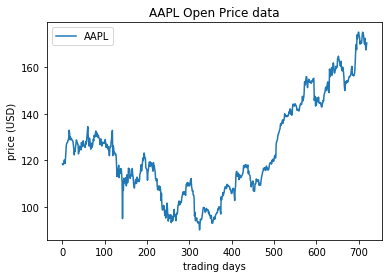

In [6]:
plt.plot(data.index, data['open'], label='AAPL')
plt.xlabel('trading days')
plt.ylabel('price (USD)')
plt.title("AAPL Open Price data")
plt.rcParams['figure.figsize'] = (10,5)
plt.legend()
plt.show()


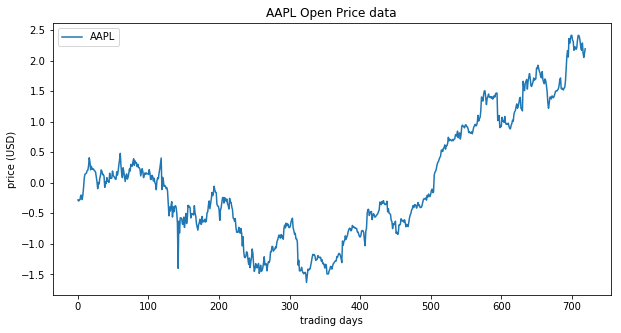

In [7]:
data = preprocessing.scale(data)
data = pd.DataFrame(data, columns=['20_day_sma','close','ewma_12','ewma_26','high','low','obv_10','open','rsi_14','volume', 'Open-Close','High-Low'])
plt.plot(data.index, data['open'], label='AAPL')
plt.xlabel('trading days')
plt.ylabel('price (USD)')
plt.title("AAPL Open Price data")
plt.rcParams['figure.figsize'] = (10,5)
plt.legend()
plt.show()

In [8]:
print("\n")
print("Open   --- mean :", np.mean(data['open']),  "  \t Std: ", np.std(data['open']),  "  \t Max: ", np.max(data['open']),  "  \t Min: ", np.min(data['open']))
print("high   --- mean :", np.mean(data['high']),  "  \t Std: ", np.std(data['high']),  "  \t Max: ", np.max(data['high']),  "  \t Min: ", np.min(data['high']))
print("low    --- mean :", np.mean(data['low']),   "  \t Std: ", np.std(data['low']),   "  \t Max: ", np.max(data['low']),   "  \t Min: ", np.min(data['low']))
print("close  --- mean :", np.mean(data['close']), "  \t Std: ", np.std(data['close']), "  \t Max: ", np.max(data['close']), "  \t Min: ", np.min(data['close']))
print("volume --- mean :", np.mean(data['volume']),"  \t Std: ", np.std(data['volume']),"  \t Max: ", np.max(data['volume']),"  \t Min: ", np.min(data['volume']))




Open   --- mean : 5.705312765434833e-16   	 Std:  1.0   	 Max:  2.4138505346729695   	 Min:  -1.6331084508797844
high   --- mean : 1.1459968776408561e-15   	 Std:  0.9999999999999998   	 Max:  2.416185072543048   	 Min:  -1.6015444102705525
low    --- mean : 4.9343245538895844e-17   	 Std:  1.0   	 Max:  2.449270173976252   	 Min:  -1.6161280208341804
close  --- mean : 2.183438615096141e-16   	 Std:  0.9999999999999998   	 Max:  2.4533308531231266   	 Min:  -1.6209372988230784
volume --- mean : -2.400857290751901e-16   	 Std:  0.9999999999999998   	 Max:  6.3816649086289825   	 Min:  -1.4033400192229408


In [9]:
from __future__ import print_function

import tensorflow as tf
from tensorflow.contrib.tensor_forest.python import tensor_forest
from tensorflow.python.ops import resources

# Ignore all GPUs, tf random forest does not benefit from it.
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Instructions for updating:
Use the retry module or similar alternatives.


In [10]:
# Training and test data
train_start = 0
train_end = int(np.floor(0.8*len(data)))
test_start = 0
test_end = int(np.floor(0.8*len(data_test)))

# training features
data_train = np.array(data)

# Build X and y
X_train = data_train[train_start:train_end]
y_train = data_test[test_start:test_end]
X_test = data_train[train_end::]
y_test = data_test[test_end::]

In [11]:
num_steps = 500 # Total steps to train
batch_size = 100 # The number of samples per batch
num_classes = 2 # buy or call
num_features = 12 # number of technical indicators
num_trees = 10
max_nodes = 1000

In [ ]:


# Input and Target data
X = tf.placeholder(tf.float32, shape=[None, num_features])
# For random forest, labels must be integers (the class id)
Y = tf.placeholder(tf.int32, shape=[None])

# Random Forest Parameters
hparams = tensor_forest.ForestHParams(num_classes=num_classes,
                                      num_features=num_features,
                                      num_trees=num_trees,
                                      max_nodes=max_nodes, regression = False).fill()

# Build the Random Forest
forest_graph = tensor_forest.RandomForestGraphs(hparams)

# Get training graph and loss
train_op = forest_graph.training_graph(X, Y)
loss_op = forest_graph.training_loss(X, Y)

# Measure the accuracy
infer_op, _, _ = forest_graph.inference_graph(X)
correct_prediction = tf.equal(tf.argmax(infer_op, 1), tf.cast(Y, tf.int64))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Initialize the variables (i.e. assign their default value) and forest resources
init_vars = tf.group(tf.global_variables_initializer(),
    resources.initialize_resources(resources.shared_resources()))

# Start TensorFlow session
sess = tf.Session()

# Run the initializer
sess.run(init_vars)

# Training
for i in range(1, num_steps + 1):
    # Prepare Data
    
    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    _, l = sess.run([train_op, loss_op], feed_dict={X: X_train, Y: y_train})
    if i % 50 == 0 or i == 1:
        acc = sess.run(accuracy_op, feed_dict={X: X_train, Y: y_train})
        print('Step %i, Loss: %f, Acc: %f' % (i, l, acc))

# Test Model
test_x, test_y = X_test, y_test
print("Test Accuracy:", sess.run(accuracy_op, feed_dict={X: test_x, Y: test_y}))

INFO:tensorflow:Constructing forest with params = 
INFO:tensorflow:{'num_trees': 10, 'max_nodes': 1000, 'bagging_fraction': 1.0, 'feature_bagging_fraction': 1.0, 'num_splits_to_consider': 10, 'max_fertile_nodes': 0, 'split_after_samples': 250, 'valid_leaf_threshold': 1, 'dominate_method': 'bootstrap', 'dominate_fraction': 0.99, 'model_name': 'all_dense', 'split_finish_name': 'basic', 'split_pruning_name': 'none', 'collate_examples': False, 'checkpoint_stats': False, 'use_running_stats_method': False, 'initialize_average_splits': False, 'inference_tree_paths': False, 'param_file': None, 'split_name': 'less_or_equal', 'early_finish_check_every_samples': 0, 'prune_every_samples': 0, 'num_classes': 2, 'num_features': 12, 'regression': False, 'bagged_num_features': 12, 'bagged_features': None, 'num_outputs': 1, 'num_output_columns': 3, 'base_random_seed': 0, 'leaf_model_type': 0, 'stats_model_type': 0, 'finish_type': 0, 'pruning_type': 0, 'split_type': 0}
